<a href="https://colab.research.google.com/github/lelyashashlyk/DataScienceLearning/blob/main/numpy/work_w_image/image_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!wget 'https://cdn.pixabay.com/photo/2023/09/02/15/03/lynx-8229077_1280.png'

--2025-07-08 11:29:05--  https://cdn.pixabay.com/photo/2023/09/02/15/03/lynx-8229077_1280.png
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.40.96, 172.64.147.160, 2606:4700:4400::ac40:93a0, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.40.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1998732 (1.9M) [image/png]
Saving to: ‘lynx-8229077_1280.png’

lynx-8229077_1280.p 100%[===================>]   1.91M  --.-KB/s    in 0.1s    

2025-07-08 11:29:06 (17.6 MB/s) - ‘lynx-8229077_1280.png’ saved [1998732/1998732]



In [3]:
image = Image.open('lynx-8229077_1280.png')

# RGB

Мы загрузили из интернета картинку `854x1280` и прочитали ее с помощью библиотеки `PIL`. Любое изображение, с точки зрения данных, представляет собой числовой массив, который может быть представлен в виде числовой таблицы или матрицы, где каждый элемент кодирует тот или иной пиксель. Но есть, как говорится, нюанс! В случае, когда наша картинка цветная, чаще всего она может быть представлена в виде трех матриц, или трехмерной матрицы, каждая из которых кодирует один из трех каналов:

* R - красный
* G - зеленый
* B - синий

Если мы говорим о 8-ми битной кодировки, то в каждом канале каждый пиксель может принимать целые значение от 0 до 255. Это значение показывает интенсивность (яркость) цвета для одного из каналов RGB или яркость белого для ЧБ изображения (одноканального). Как известно, чтобы закодировать число 256 в двоичном виде - нулями и единицами, нужно 8 знаков. Поэтому мы говорим о 8-мибитном изображении.

Ниже дан калькулятор RGB. Поиграйтесь им!

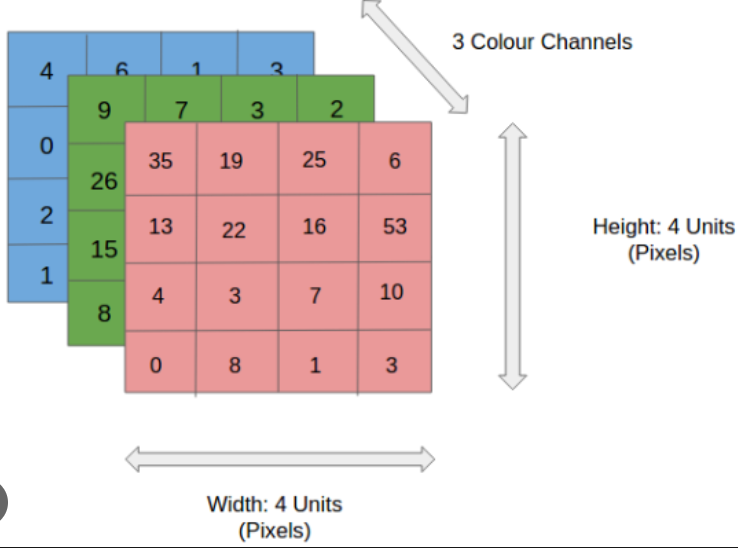

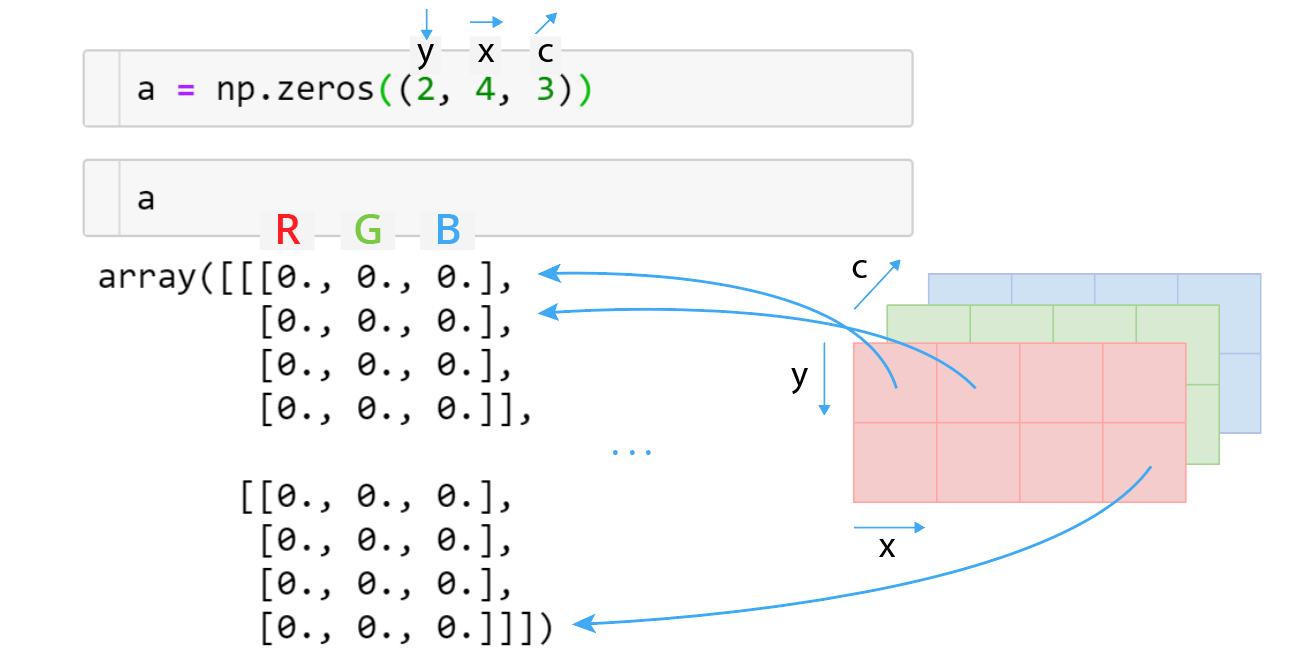

In [4]:
import ipywidgets as widgets
from IPython.display import display, clear_output
slider_r = widgets.FloatSlider(
    value=0,
    min=0,
    max=255,
    step=1,
    description='Красный:'
)
slider_g = widgets.FloatSlider(
    value=0,
    min=0,
    max=255,
    step=1,
    description='Зеленый:'
)
slider_b = widgets.FloatSlider(
    value=0,
    min=0,
    max=255,
    step=1,
    description='Синий:'
)

def update_rgb_image(r_value, g_value, b_value):
    width, height = 200, 200
    rgb_image = np.zeros((height, width, 3), dtype=np.uint8)

    r = int(r_value)
    g = int(g_value)
    b = int(b_value)

    rgb_image[:, :, 0] = r
    rgb_image[:, :, 1] = g
    rgb_image[:, :, 2] = b

    image = Image.fromarray(rgb_image)

    plt.figure(figsize=(4, 4))
    plt.imshow(image)
    plt.title(f'RGB изображение')
    plt.axis('off')
    plt.show()


out = widgets.Output()


def on_slider_change(change):
    r_value = slider_r.value
    g_value = slider_g.value
    b_value = slider_b.value

    with out:
        clear_output(wait=True)
        update_rgb_image(r_value, g_value, b_value)

slider_r.observe(on_slider_change, 'value')
slider_g.observe(on_slider_change, 'value')
slider_b.observe(on_slider_change, 'value')
display(widgets.VBox([slider_r, slider_g, slider_b]))
display(out)

Output()

# Image -> List

In [5]:
rgb_matrix = np.array(image)

In [6]:
rgb_matrix.shape

(854, 1280, 4)

In [7]:
r_matrix = rgb_matrix[:,:,0].tolist()
g_matrix = rgb_matrix[:,:,1].tolist()
b_matrix = rgb_matrix[:,:,2].tolist()

In [8]:
print(*r_matrix[:10], sep='\n')

[15, 17, 17, 19, 19, 21, 23, 23, 26, 28, 29, 27, 30, 30, 31, 31, 32, 32, 33, 33, 34, 35, 35, 36, 38, 40, 43, 45, 46, 47, 48, 53, 55, 56, 57, 58, 60, 61, 62, 63, 64, 66, 65, 66, 66, 66, 65, 64, 63, 63, 63, 66, 68, 69, 68, 61, 46, 29, 12, 3, 0, 0, 4, 13, 34, 43, 41, 35, 27, 23, 21, 20, 19, 18, 17, 17, 16, 16, 16, 16, 15, 15, 14, 15, 18, 20, 23, 28, 34, 37, 38, 39, 38, 38, 38, 38, 38, 38, 39, 38, 39, 40, 40, 39, 39, 40, 39, 37, 27, 16, 3, 0, 2, 13, 31, 39, 41, 44, 45, 47, 49, 50, 51, 51, 50, 50, 51, 51, 53, 53, 54, 53, 54, 55, 55, 56, 55, 56, 57, 59, 60, 59, 61, 62, 64, 65, 68, 68, 68, 69, 68, 67, 67, 67, 66, 66, 66, 65, 63, 64, 64, 64, 64, 63, 62, 64, 66, 66, 68, 69, 69, 69, 70, 72, 71, 70, 71, 72, 71, 71, 69, 70, 69, 67, 66, 67, 67, 67, 67, 64, 63, 62, 62, 61, 61, 60, 59, 58, 57, 57, 56, 56, 53, 52, 52, 52, 52, 51, 51, 50, 51, 50, 51, 52, 51, 51, 51, 51, 50, 51, 50, 51, 52, 51, 52, 54, 55, 56, 55, 58, 62, 65, 67, 67, 69, 70, 72, 76, 75, 76, 75, 75, 77, 76, 76, 76, 76, 77, 76, 78, 80, 80

Мы создали три двумерных списка `r_matrix`, `g_matrix` и `b_matrix` размером (854, 1280) каждый для каждого канала по отдельности. Лучше не пытайтесь их посмотреть без использования `print()` так как они слишком большие для этого.

In [9]:
def show_imade(list_: list) -> Image.Image:
  return Image.fromarray(np.array(list_, dtype = np.uint8))

Для пущей легкости работы, для вас написана функция `show_imade()`, которая вашу матрицу (двумерный list) превращает в картинку и ее показывает. Посмотрите, какое изображение будет сформировано для каждого канала.

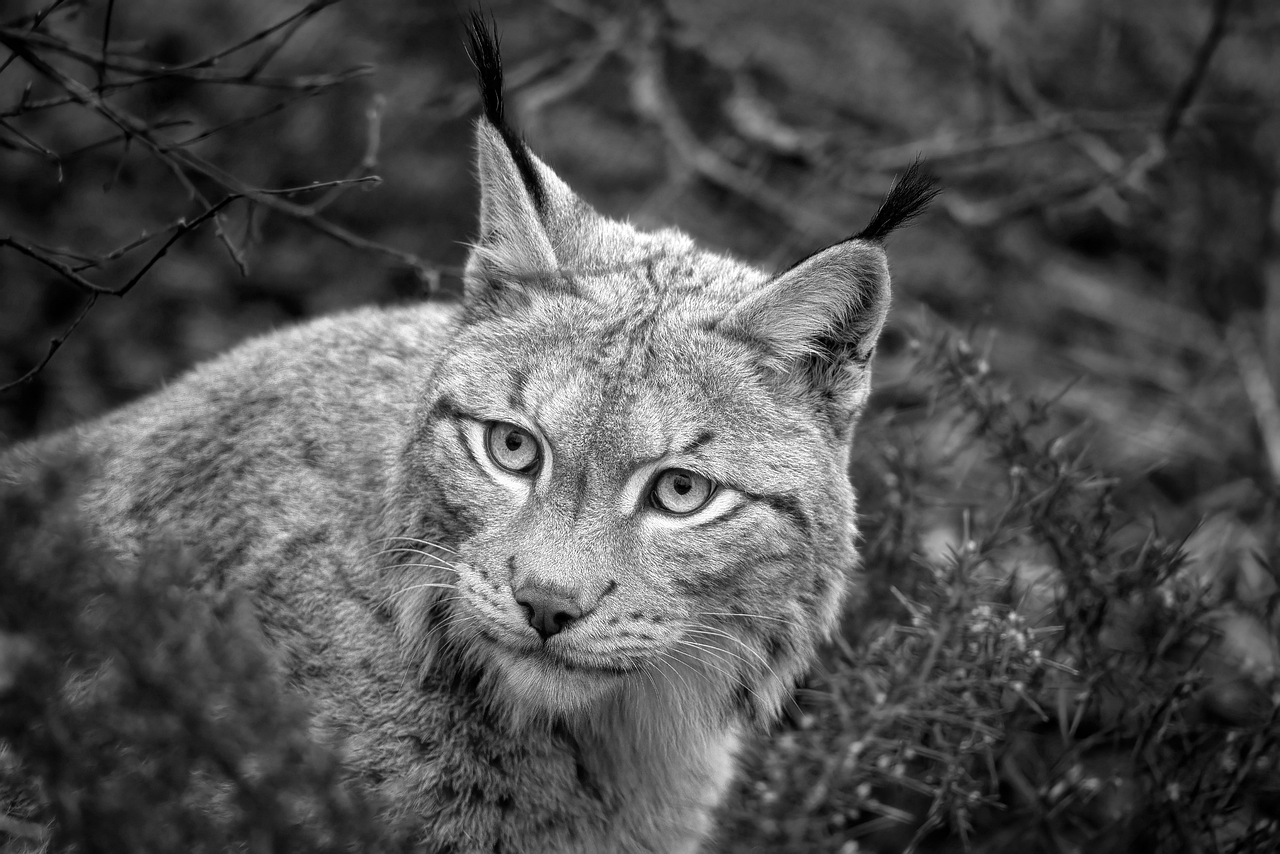

In [10]:
show_imade(r_matrix)

# Задача.

Мы посмотрели на изображение каждого канала. Мы увидели, что один канал будет всегда интерпретироваться как черно-белое изображение, но все полученные картинки немного отличаются между собой, а поэтому считать каждое изображение самостоятельным не очень правильно.

Подумайте, как из трех матриц для каждого канала сделать одну, которая будет интерпретироваться как полноценное черно-белое изображение?

Сохраните полученный числовой массив в переменную `b_w_matrix`.

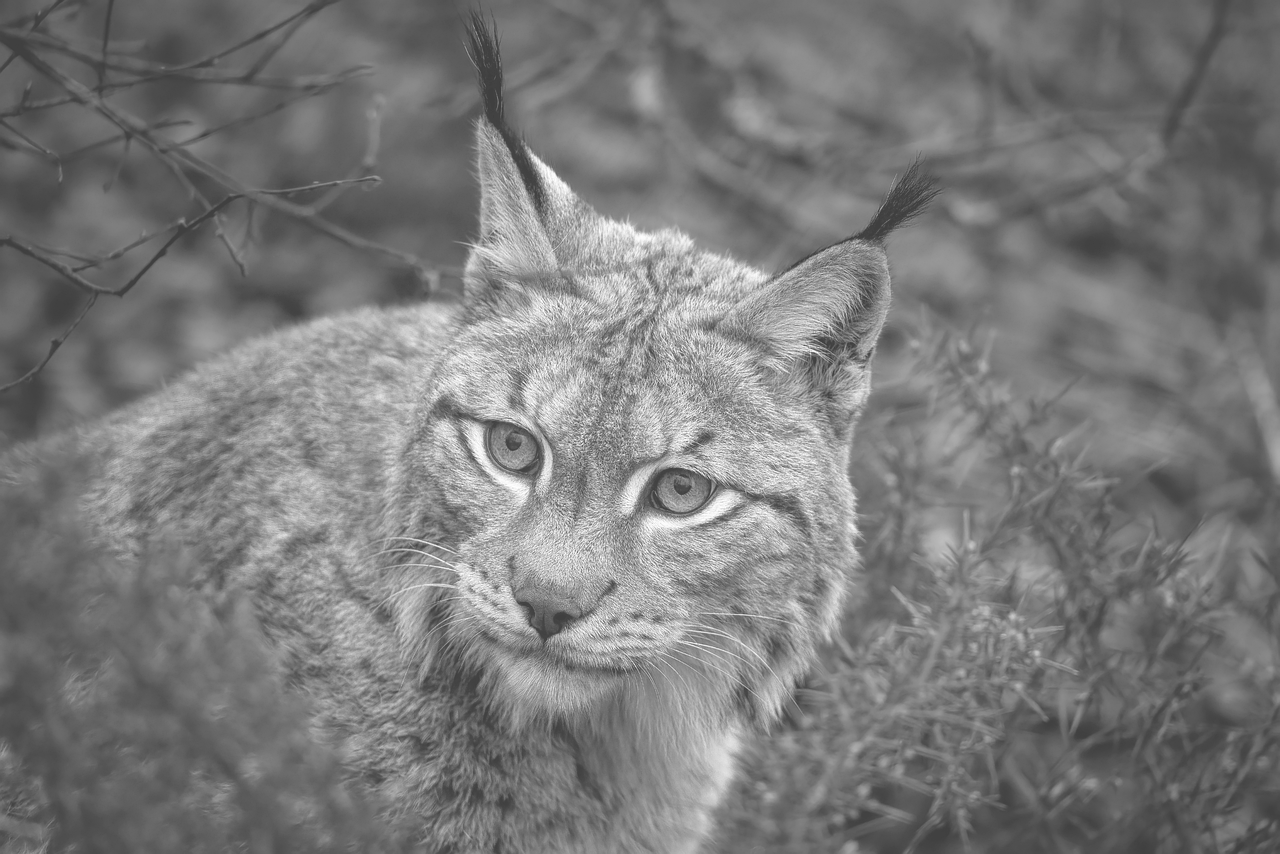

In [11]:
b_w_matrix = rgb_matrix.mean(axis=2).astype(np.uint8)
show_imade(b_w_matrix) # среднее по оси каналов (2) приведенное к типу целых от 0 до 255


# Задача

Обрежьте изображение справа, сделав его размер (854, 1029)

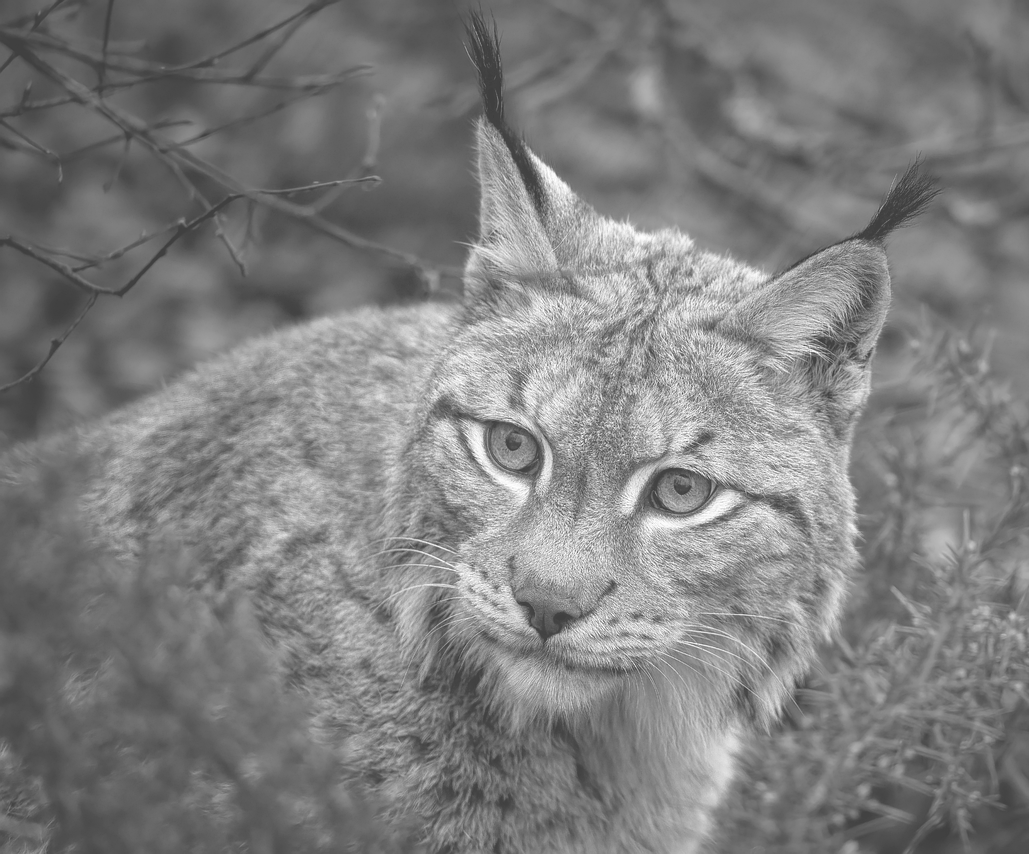

In [12]:
show_imade(b_w_matrix[:, :1029]) # сделала срез по столбцам

# Задача

Сделайте для этой картинки уменьшенную копию сжав ее в 7 раз. Для этого стоит разбить нашу матрицу на блоки размером 7*7 и для каждого блока пикселей найти среднее арифметическое. Это очевидно приведет к ухудшению качества, но в нашей задаче это не критично. Решите задачу итеративно.

In [13]:
print(b_w_matrix[:14, :14])

[[79 80 80 82 82 83 84 84 86 87 87 87 87 87]
 [79 79 81 82 83 84 84 85 86 87 87 88 88 88]
 [80 80 82 82 83 84 84 86 86 87 87 87 86 88]
 [81 81 81 81 83 84 85 85 86 87 86 87 87 87]
 [81 81 81 80 83 84 85 86 86 87 87 87 87 86]
 [81 81 82 82 83 84 84 86 87 87 87 87 87 87]
 [81 82 82 83 83 84 85 85 86 88 88 88 87 87]
 [82 82 83 83 84 84 85 85 86 87 88 87 87 88]
 [82 82 83 83 84 85 86 87 88 87 87 87 88 88]
 [82 83 84 83 85 85 86 87 87 88 88 88 87 88]
 [83 83 83 84 84 85 87 87 88 88 86 87 87 87]
 [83 84 84 85 86 86 87 87 88 89 88 88 88 88]
 [84 84 84 85 86 87 87 87 88 89 88 87 88 88]
 [85 85 86 86 87 87 88 87 88 88 89 89 89 88]]


In [14]:
# нерабочая попытка №1

# from statistics import mean

# for i in range(0,len(b_w_matrix),7):
#   c = 0
#   for j in range(0,len(b_w_matrix),7):
#       if len(b_w_matrix[i, c:j]) > 1:
#         b_w_matrix[c][j] = (np.sum(b_w_matrix[i, c:j])/7).astype(np.uint8)
#       if len(b_w_matrix[c:i, j]) > 1:
#         b_w_matrix[i][c] = (np.sum(b_w_matrix[c:i, j])/7).astype(np.uint8)
#       c += 1



In [15]:
type(b_w_matrix)
b_w_matrix.shape

(854, 1280)

In [16]:
h, w = b_w_matrix.shape
h, w= h-h%7, w-w%7
h_new, w_new = h//7, w//7
new_matrix7 = np.zeros((h_new, w_new), dtype = np.uint8)

for i in range(0, h, 7):
  for j in range(0, w, 7):
    temp = b_w_matrix[i:i+7, j:j+7]
    temp_mean = np.mean(temp)
    new_matrix7[i//7, j//7] = int(temp_mean)


In [17]:
len(new_matrix7)

122

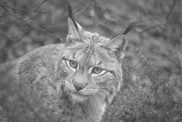

In [18]:
show_imade(new_matrix7)

In [19]:
# сжатая в 2 раза копия для проверки

h, w = b_w_matrix.shape
h, w = h-h%2, w-w%2
h_new, w_new = h//2, w//2
new_matrix2 = np.zeros((h_new, w_new), dtype = np.uint8)

for i in range(0, h, 2):
  for j in range(0, w, 2):
    temp = b_w_matrix[i:i+2, j:j+2]
    temp_mean = np.mean(temp)
    new_matrix2[i//2, j//2] = int(temp_mean)


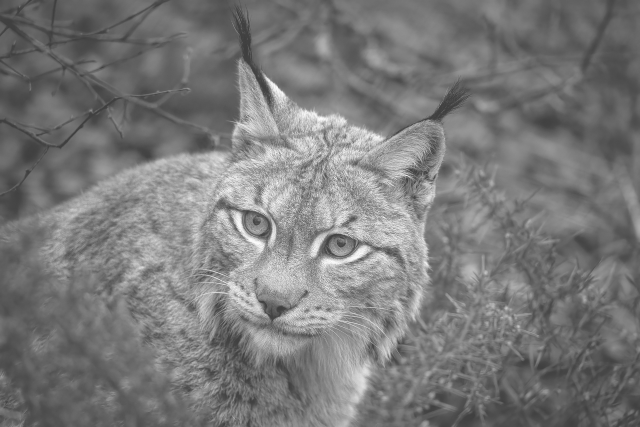

In [20]:
show_imade(new_matrix2)

In [21]:
a, b, c = rgb_matrix.shape
a, b, c = a - a%3, b-b%3, c-c%3
a_new,b_new, c_new = a//3, b//3, c//3
rgb_compressed = np.zeros((h_new, w_new), dtype = np.uint8)

for i in range(0, h, 3):
  for j in range(0, w, 3):

    temp = b_w_matrix[i:i+7, j:j+7]
    temp_mean = np.mean(temp)
    new_matrix7[i//7, j//7] = int(temp_mean)


IndexError: index 182 is out of bounds for axis 1 with size 182